# Forecasting Demand - Time Series with SARIMA #

In the world of logistics, we want everything just in time: "deliver products at the right place at the right time". The phrase itself sounds simple, but there is a lot of uncertainty that causes our expectations to fail.

This Juypter Notebook is about forecasting. We are NOT prophesying the future here, but we are about to use the statistical model to analyze trends and patterns and anticipate the demand that follows a specific cycle.

We will have to introduce what is a time series. Simply put, a time series is data accompanied by timestamps. For example, the heights of ocean tides measure at a specific time, counts of sunspots in time periods, and even the daily closing value of the Dow Jones Industrial Average, etc.

In terms of customer demands, customer buying habits do also follow trends and patterns. The following is an example of the sales history of a store. One can see a trend or pattern cycle through different years.

<img src="https://www.kaggleusercontent.com/kf/52936642/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Vpp11P-QbjxkcaMfsA7Vaw.U0bJ-kLRBe6uOsD3kmuMrhivV_f2gMdczStSQmXnd9AvPVvfJX6YSIg6YVLJ33N7NOT9saij6l3PHrpm-XZ0raYrRMOALZI6kCAt9Vn4T7UEytaBfvYgg6B81P5D_nQxaSlkjO7fZEpan1Lx1AmFCQtfy7_xkiEz5LNshzpEuTiXZ55SoLnV3GMaBySA_4P99BrXOQC-XVHcMPKFeegsS0skWsX-XrIA8srbFzWBf_vCEBSTTFWaftrFnU5fvhxk_8TNUgR9YymJwFWUBRBcWLCMiTQCuDVz9STDE5fbU48gPWC39fM2xWC0xp2wjyy57CwJXSawIQlhBlrZVelVk_Eqqx2ESVnN5fcytAWN2p4nKzLkGRFRLNqmUjeQ_Qk2ASnDaYi1wWtSoOgYap7vsnXyHzHnK7KfytmA7etppo5F_o27QghVjvR1jyNWWkgIjc-aCKinec25_Y2CXkhvK4fgIRpnxYvcbUfkLwfEbTvxPdjaxAbALsj1mgX-GR4rQh_gkPdOFZ7hmlcLDqrZEQOQpPAFJPtFlbuRa5ztEwgo6MJDTcFKMGioUhVif67ArLkHoyHulXMNvsxNICwARsl7o0Uu8ExaJDGz6-GZcNx_TA4nDLPZKI4uOWnRlkCMMg-f_yTmMDEzrGz3JfLpEOxD-DHQ3FqH2IffiTmQLcw.JBlO9rkzsf2i9ARuo00NeA/__results___files/__results___53_0.png">


Some time series follows a particular trend and shape and maybe a seasonal factor. If there is a mathematical model that we can fit the data onto, we can predict the values at a given time INTO THE FUTURE.

This is important, we can use the model to forecast.



### ARIMA & SARIMA ###

ARIMA, or, Autoregressive Integrated Moving Average, is one of the forecasting methods for time series over equal time increments. And SARIMA, or, Seasonal Autoregressive Integrated Moving Average, is an extension of ARIMA that supports time-series data with a seasonal component.

ARIMA Explained: https://www.youtube.com/watch?v=3UmyHed0iYE
SARIMA Explained: https://www.youtube.com/watch?v=WjeGUs6mzXg

ARIMA Model – Complete Guide to Time Series Forecasting in Python, by Selva Prabhakaran:
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Configuring SARIMA(p,d,q)(P,D,Q)m:

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.


### Problem Description and Dataset ###

For this notebook, the objective is to forecast the number of champagne sales per month for the Perrin Freres brand. The dataset records monthly champagne sales for approximately 9+ years from January 1964 to September 1972. The dataset belongs to Makridakis and Wheelwright, 1989. 

The dataset can be found at: https://www.kaggle.com/galibce003/perrin-freres-monthly-champagne-sales
or
I have uploaded it to my Github page:

https://github.com/totochow/Perrin-Freres-champagne/blob/main/Perrin%20Freres%20monthly%20champagne%20sales%20millions.csv


Without further ado, let's start analyzing.

In [1]:
#import all necessary packages:


from statsmodels.graphics.tsaplots import plot_pacf #PARTIAL AUTO-CORRELATION PLOT:
from statsmodels.graphics.tsaplots import plot_acf #AUTO-CORRELATION PLOT:
from statsmodels.tsa.statespace.sarimax import SARIMAX #SARIMAX Model:
from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller - to test if to test the given Time series is stationary or not
import matplotlib.pyplot as plt #plotting from matplotlib
from tqdm import tqdm_notebook #this model might run for an extended period of time, let us use progress bar!

import pandas as pd #Pandas for reading in csv file and using dataframe
import itertools #use product to find combinations of paramaters

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sets the backend of matplotlib to the 'inline' backend:
%matplotlib inline

In [2]:
#Read in data:
csv_link = 'https://raw.githubusercontent.com/totochow/Perrin-Freres-champagne/main/Perrin%20Freres%20monthly%20champagne%20sales%20millions.csv'
data = pd.read_csv(csv_link)

In [3]:
#We will take a look at the data:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
#Rename second column to "ChampagneSales"
data.rename(columns = {'Perrin Freres monthly champagne sales millions ?64-?72': 'ChampagneSales'}, inplace = True)
data.head()

,Month,ChampagneSales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [5]:
#take a closer look at Champange Sales
data.describe()

,ChampagneSales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


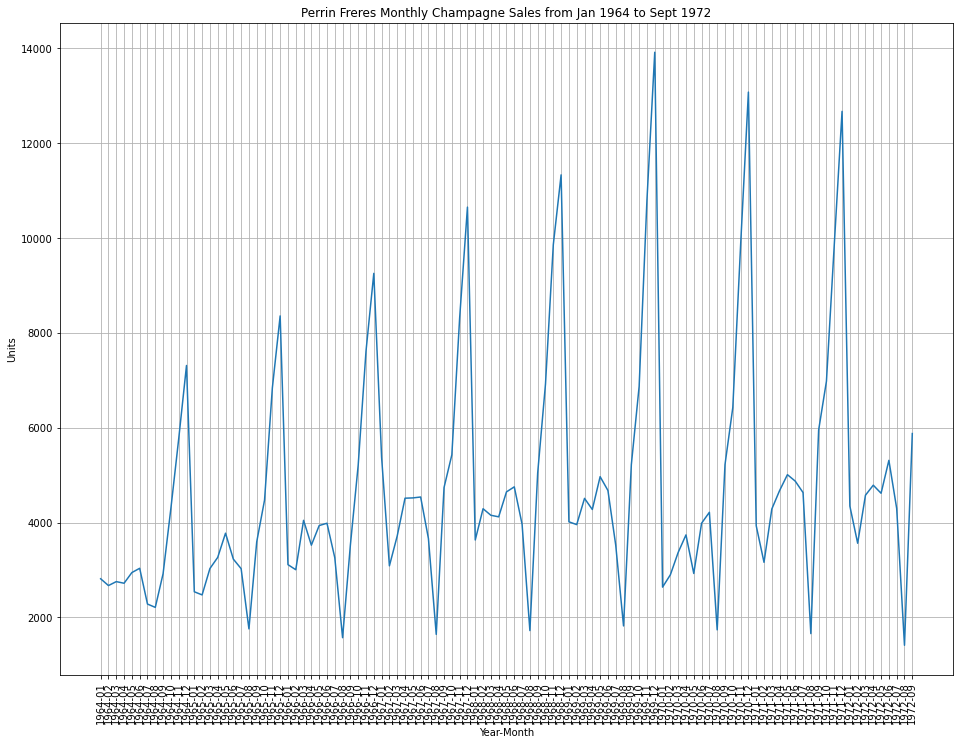

In [6]:
plt.figure(figsize=[16, 12]); # Set dimensions for figure
plt.plot(data['Month'], data['ChampagneSales'])
plt.title('Perrin Freres Monthly Champagne Sales from Jan 1964 to Sept 1972')
plt.ylabel('Units')
plt.xlabel('Year-Month')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

It is very clearly that there is a trend/pattern in the almost 10 years worth of sales data.

In order to use the SARIMA model, the data must be STATIONARY, meaning that the mean, variance and autocorrelation structure do not change over time - stablize the data.

And to test if the data is stationary or not, we can use the Augmented Dickey-Fuller test.

Null hypothesis = non-stationary. 
Alt hypothesis = stationary.

So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [7]:
#Since we will be using this test for a few times, lets write a function to reuse the codes:

def adf_test(df):
    t = adfuller(df)
    print('H0: It is non stationary\nH1: It is stationary\n')
    print(f'Augmented Dickey-Fuller Statistic: {t[0]}')
    print(f'p-value: {t[1]}')
    if t[1] <= 0.05:
        print('\np-value is less than or equal to 0.05. \nWe have signifanct data to reject the null hypothesis(H0). \nHence the data is STATIONARY')
    else:
        print('\np-value is greater than 0.05. \nWe do NOT have enough evdience to reject the null hypothesis(H0). \nHence the data is NOT stationary')
    



adf_test(data['ChampagneSales'])


H0: It is non stationary
H1: It is stationary

Augmented Dickey-Fuller Statistic: -1.8335930563276246
p-value: 0.3639157716602442

p-value is greater than 0.05. 
We do NOT have enough evdience to reject the null hypothesis(H0). 
Hence the data is NOT stationary


Therefore our data is non-stationary, and hence need some more work.

### AUTO-CORRELATION: ###

Let us look its ACF.

https://www.kaggle.com/harshjain123/time-series-arima-sarima#AUTO-CORRELATION:

Autocorrelation is the measure of the degree of similarity between a given time series and the lagged version of that time series over successive time periods. It is similar to calculating the correlation between two different variables except in Autocorrelation we calculate the correlation between two different versions Xt and Xt-k of the same time series


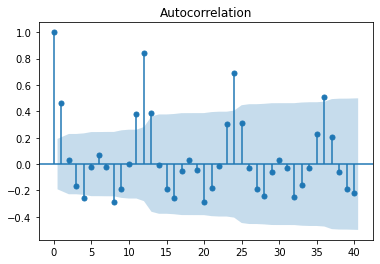

In [8]:
plot_acf(data['ChampagneSales'], lags = 40);
#plot_pacf(data['ChampagneSales'], lags = 40);

From the ACF, it seems there are corralation between eery 12th term.
we can then assume there is a seasonality at m = 12
we will use the .diff(x) function to differencing the data for x terms.

In [9]:
# m = 12

#Differencing the data to 12 month and apply the ADF test
first_diff = data['ChampagneSales'].diff(12).dropna()

#Lets test the differenced data to see if it is stationary:
adf_test(first_diff)


H0: It is non stationary
H1: It is stationary

Augmented Dickey-Fuller Statistic: -7.626619157213163
p-value: 2.060579696813685e-11

p-value is less than or equal to 0.05. 
We have signifanct data to reject the null hypothesis(H0). 
Hence the data is STATIONARY


P value is less than 0.05 that means we can reject the null hypothesis and conclude that data has no unit root and is stationary.

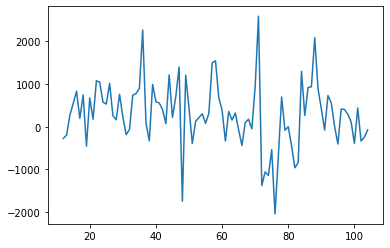

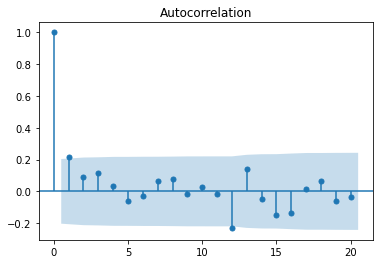

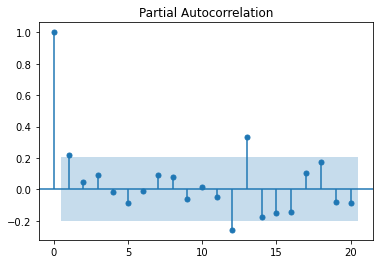

In [10]:
first_diff.plot()
plot_acf(first_diff);
plot_pacf(first_diff);

In [11]:
#we will use all possible combinations parameters to find the best model with the highest score:
#set parameter range

#Summary of rules for identifying ARIMA models : https://people.duke.edu/~rnau/arimrule.htm

#since from both the ACF and PACF, the lag become significant:

p = range(0,3,1)
d = [1]
q = range(0,3,1)
P = range(0,3,1)
D = [1]
Q = range(0,3,1)
s = [12]
# list of all parameter combos
pdqPDQs = list(itertools.product(p, d, q, P, D , Q, s))
len(pdqPDQs)

81

In [12]:
def SARIMA_optimized(df, pdqPDQs):
  
    results = []
    
    for pdqPDQs in tqdm_notebook(pdqPDQs):
        try: 
            model = SARIMAX(df, order=(pdqPDQs[0], pdqPDQs[1], pdqPDQs[2]), seasonal_order=(pdqPDQs[3], pdqPDQs[4], pdqPDQs[5], pdqPDQs[6])).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([pdqPDQs, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [13]:
#define the cutoff point for training set and validation set
percentage = 0.80
cutoff = round(len(data['ChampagneSales'])*percentage)
cutoff

84

In [14]:
#Setting up the training dataset and testing dataset
train_df = data['ChampagneSales'][:cutoff]
test_df = data['ChampagneSales'][cutoff:]

In [15]:
#Lets find our most optimal parameters:
result_SARIMA = SARIMA_optimized(train_df, pdqPDQs)

In [16]:
#taking a peak at the result best choice of parameters:
result_SARIMA

,"(p,q)x(P,Q)",AIC
0,"(0, 1, 2, 1, 1, 2, 12)",1146.757624
1,"(1, 1, 1, 1, 1, 2, 12)",1147.007037
2,"(0, 1, 2, 2, 1, 1, 12)",1148.444893
3,"(0, 1, 2, 2, 1, 2, 12)",1148.725787
4,"(2, 1, 1, 1, 1, 2, 12)",1148.796179
...,...,...
76,"(0, 1, 0, 1, 1, 0, 12)",1181.064392
77,"(0, 1, 0, 2, 1, 0, 12)",1181.146485
78,"(0, 1, 0, 1, 1, 1, 12)",1182.213521
79,"(0, 1, 0, 0, 1, 1, 12)",1182.521729


In [17]:
# fitting the model...
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_df,order=result_SARIMA.iloc[0,0][0:3],seasonal_order=result_SARIMA.iloc[0,0][3:])
results=model.fit()

In [18]:
#results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     ChampagneSales   No. Observations:                   84
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -567.379
Date:                            Sun, 22 Aug 2021   AIC                           1146.758
Time:                                    22:42:11   BIC                           1160.334
Sample:                                         0   HQIC                          1152.156
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6434      0.108     -5.981      0.000      -0.854      -0.433
ma.L2         -0.2297      0.105     -2.189      0.029      -0.435      -0.024
ar.S.L12       0.9978      0.012     81.928      0.000       0.974       1.022
ma.S.L12      -1.6629      0.139    -11.970      0.000      -1.935      -1.391
ma.S.L24       0.7007      0.165      4.244      0.000       0.377       1.024
sigma2      3.272e+05   7.32e-07   4.47e+11      0.000    3.27e+05    3.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 9.05
Prob(Q):                              0.41   Prob(JB):                         0.01
Heteroskedasticity (H):               1.77   Skew:                            -0.10
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.13e+26. Standard errors may be unstable.
"""

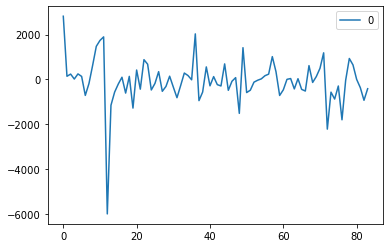

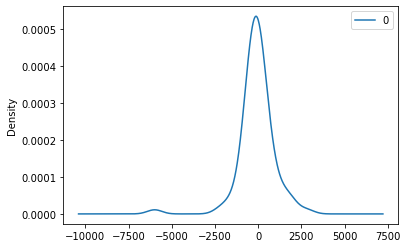

                 0
count    84.000000
mean    -79.554087
std    1030.717266
min   -5994.106148
25%    -473.145429
50%     -38.933038
75%     255.036278
max    2815.000000


In [19]:
from matplotlib import pyplot
residuals = pd.DataFrame(results.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<AxesSubplot:>

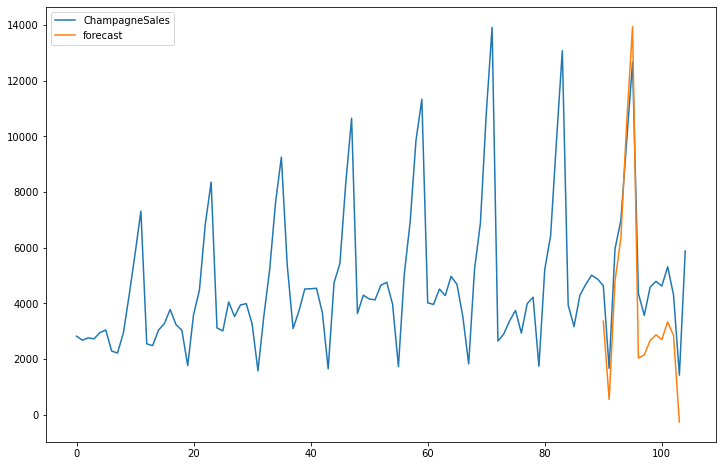

In [20]:
# using our model to predict the last 20% of data
# it seems that our forcast is very much following the same trend of the real data.
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['ChampagneSales','forecast']].plot(figsize=(12,8))